# Gesture Detection Model

## 1 Engineer features

### 1.1 Import libraries and transformers  

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\Christian\\git\\drone_steering\\models'

In [3]:
os.chdir('..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer, DataResampler

### 1.2  Load data

In [5]:
tolerance_range = 6
sazero = 700

In [6]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01.csv
1,features_flip_c_02_120.csv,labels_flip_c_02.csv
2,features_flip_c_03_120.csv,labels_flip_c_03.csv
3,features_flip_l_01_120.csv,labels_flip_l_01.csv
4,features_flip_l_02_120.csv,labels_flip_l_02.csv
5,features_flip_l_03_120.csv,labels_flip_l_03.csv
6,features_flip_p_01_120.csv,labels_flip_p_01.csv
7,features_land_c_01_120.csv,labels_land_c_01.csv
8,features_land_c_02_120.csv,labels_land_c_02.csv
9,features_land_c_03_120.csv,labels_land_c_03.csv


In [7]:
de.load_data()
de.assemble_data(tolerance_range=tolerance_range)

In [8]:
de.display_information()

i: 0 	shape X: (603, 18, 16) 	shape y: (603,) 	count: 205
i: 1 	shape X: (519, 18, 16) 	shape y: (519,) 	count: 193
i: 2 	shape X: (498, 18, 16) 	shape y: (498,) 	count: 239
i: 3 	shape X: (650, 18, 16) 	shape y: (650,) 	count: 414
i: 4 	shape X: (508, 18, 16) 	shape y: (508,) 	count: 251
i: 5 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 258
i: 6 	shape X: (601, 18, 16) 	shape y: (601,) 	count: 260
i: 7 	shape X: (440, 18, 16) 	shape y: (440,) 	count: 215
i: 8 	shape X: (490, 18, 16) 	shape y: (490,) 	count: 190
i: 9 	shape X: (476, 18, 16) 	shape y: (476,) 	count: 206
i: 10 	shape X: (492, 18, 16) 	shape y: (492,) 	count: 193
i: 11 	shape X: (436, 18, 16) 	shape y: (436,) 	count: 143
i: 12 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 206
i: 13 	shape X: (551, 18, 16) 	shape y: (551,) 	count: 239
i: 14 	shape X: (550, 18, 16) 	shape y: (550,) 	count: 226
i: 15 	shape X: (549, 18, 16) 	shape y: (549,) 	count: 235
i: 16 	shape X: (541, 18, 16) 	shape y: (541,) 	count: 172
i: 17 	

In [9]:
dr = DataResampler()
dr.fit(de.X, de.y)
dr.restrict_zero_labels(sazero)
dr.display_information()

-------------------------------------
Current number of zero-labels: 10449
New number of zero-labels: 700


,abs_orig,pct_orig,abs_current,pct_current
0,10449,57.45,700,8.29
1,1197,6.58,1197,14.18
2,992,5.45,992,11.75
3,1820,10.01,1820,21.57
4,1301,7.15,1301,15.42
5,1276,7.02,1276,15.12
6,1153,6.34,1153,13.66


In [10]:
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(dr.X)
y = to_categorical(dr.y)

## 2 Train model

### 2.1  Split in train / test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 2.2 Define and compile model

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [13]:
n_timesteps = X.shape[1] # here 18
n_features = X.shape[2] # here 16
n_outputs =  y.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


### 2.3 Fit and validate model

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
6751/6751 [==============================] - 10s 2ms/step - loss: 0.4572 - acc: 0.8526
Epoch 2/100
6751/6751 [==============================] - 10s 1ms/step - loss: 0.1934 - acc: 0.9447
Epoch 3/100
6751/6751 [==============================] - 9s 1ms/step - loss: 0.1568 - acc: 0.9541
Epoch 4/100
6751/6751 [==============================] - 9s 1ms/step - loss: 0.1596 - acc: 0.9522
Epoch 5/100
6751/6751 [==============================] - 11s 2ms/step - loss: 0.1373 - acc: 0.9590: 0s - loss: 0.1367 - ac
Epoch 6/100
6751/6751 [==============================] - 10s 2ms/step - loss: 0.1400 - acc: 0.9600
Epoch 7/100
6751/6751 [==============================] - 10s 2ms/step - loss: 0.1363 - acc: 0.9613
Epoch 8/100
6751/6751 [==============================] - 11s 2ms/step - loss: 0.1297 - acc: 0.9613
Epoch 9/100
6751/6751 [==============================] - 13s 2ms/step - loss: 0.1618 - acc: 0.9547
Epoch 10/100
6751/6751 [==============================] - 12s 2ms/step - loss: 0.1292 -

6751/6751 [==============================] - 16s 2ms/step - loss: 0.0795 - acc: 0.9753: 0s - loss: 0.0797 - 
Epoch 78/100
6751/6751 [==============================] - 18s 3ms/step - loss: 0.0811 - acc: 0.9735
Epoch 79/100
6751/6751 [==============================] - 18s 3ms/step - loss: 0.0752 - acc: 0.9767: - ETA: 0s - loss: 0.0744 - 
Epoch 80/100
6751/6751 [==============================] - 23s 3ms/step - loss: 0.0898 - acc: 0.9720:
Epoch 81/100
6751/6751 [==============================] - 18s 3ms/step - loss: 0.0748 - acc: 0.9747
Epoch 82/100
6751/6751 [==============================] - 21s 3ms/step - loss: 0.0828 - acc: 0.9739
Epoch 83/100
6751/6751 [==============================] - 21s 3ms/step - loss: 0.0826 - acc: 0.9726
Epoch 84/100
6751/6751 [==============================] - 17s 3ms/step - loss: 0.0763 - acc: 0.9757
Epoch 85/100
6751/6751 [==============================] - 19s 3ms/step - loss: 0.0798 - acc: 0.9760
Epoch 86/100
6751/6751 [==============================] - 22s

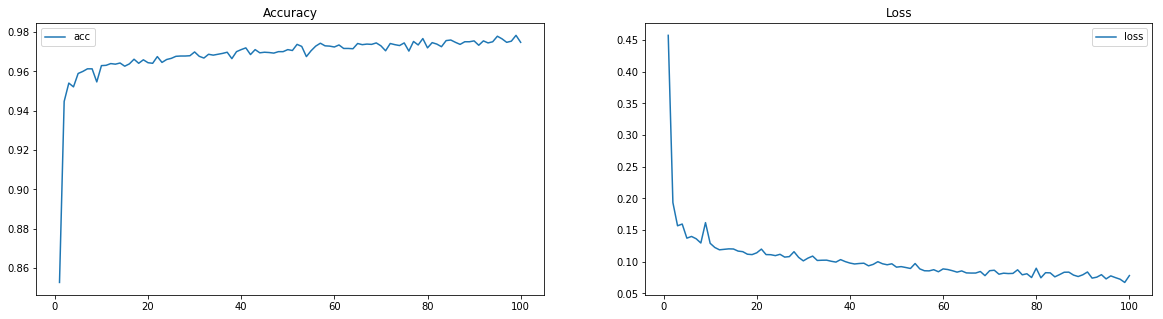

In [15]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [16]:
eval_results = np.round(model.evaluate(X_test, y_test, batch_size=16, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

1688/1688 [==============================] - 2s 963us/step
Loss:     0.15
Accuracy: 0.97


In [17]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 15 	Pred: 6 	Actual: 0 	Probability: 0.85
Index: 32 	Pred: 0 	Actual: 5 	Probability: 0.67
Index: 102 	Pred: 0 	Actual: 4 	Probability: 0.71
Index: 131 	Pred: 1 	Actual: 0 	Probability: 1.0
Index: 155 	Pred: 6 	Actual: 0 	Probability: 0.95
Index: 179 	Pred: 3 	Actual: 0 	Probability: 0.99
Index: 232 	Pred: 2 	Actual: 0 	Probability: 0.81
Index: 238 	Pred: 4 	Actual: 0 	Probability: 0.6
Index: 279 	Pred: 2 	Actual: 0 	Probability: 0.9
Index: 296 	Pred: 5 	Actual: 0 	Probability: 0.9
Index: 359 	Pred: 6 	Actual: 0 	Probability: 0.74
Index: 374 	Pred: 6 	Actual: 0 	Probability: 0.77
Index: 418 	Pred: 0 	Actual: 3 	Probability: 0.78
Index: 476 	Pred: 1 	Actual: 0 	Probability: 0.88
Index: 510 	Pred: 1 	Actual: 0 	Probability: 0.88
Index: 523 	Pred: 1 	Actual: 0 	Probability: 1.0
Index: 594 	Pred: 6 	Actual: 0 	Probability: 1.0
Index: 649 	Pred: 1 	Actual: 0 	Probability: 1.0
Index: 653 	Pred: 5 	Actual: 0 	Probability: 0.59
Index: 654 	Pred: 6 	Actual: 0 	Probability: 0.87
Index: 74

In [18]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 0 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 2 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 3 	Pred: 3 	Actual: 3 	Probability: 0.95
Index: 4 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 5 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 6 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 7 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 8 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 9 	Pred: 5 	Actual: 5 	Probability: 0.98
Index: 10 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 11 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 12 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 13 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 14 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 16 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 17 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 18 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 19 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 20 	Pred: 2 	Actual: 2 	Probability: 0.98
Index: 21 	Pred: 3 	Actual: 3 	Probability:

Index: 176 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 177 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 178 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 180 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 181 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 182 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 183 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 184 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 185 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 186 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 187 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 188 	Pred: 4 	Actual: 4 	Probability: 0.59
Index: 189 	Pred: 5 	Actual: 5 	Probability: 0.87
Index: 190 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 191 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 192 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 193 	Pred: 4 	Actual: 4 	Probability: 0.98
Index: 194 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 195 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 196 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 197 	Pr

Index: 349 	Pred: 5 	Actual: 5 	Probability: 0.98
Index: 350 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 351 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 352 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 353 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 354 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 355 	Pred: 2 	Actual: 2 	Probability: 0.99
Index: 356 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 357 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 358 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 360 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 361 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 362 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 363 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 364 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 365 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 366 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 367 	Pred: 1 	Actual: 1 	Probability: 0.9
Index: 368 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 369 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 370 	

Index: 524 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 525 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 526 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 527 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 528 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 529 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 530 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 531 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 532 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 533 	Pred: 1 	Actual: 1 	Probability: 0.93
Index: 534 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 535 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 536 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 537 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 538 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 539 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 540 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 541 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 542 	Pred: 0 	Actual: 0 	Probability: 0.79
Index: 543 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 544 	Pre

Index: 694 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 695 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 696 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 697 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 698 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 699 	Pred: 1 	Actual: 1 	Probability: 0.85
Index: 700 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 701 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 702 	Pred: 6 	Actual: 6 	Probability: 0.96
Index: 703 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 704 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 705 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 706 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 707 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 708 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 709 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 710 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 711 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 712 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 713 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 714 	

Index: 874 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 875 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 876 	Pred: 2 	Actual: 2 	Probability: 0.96
Index: 877 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 878 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 879 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 880 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 881 	Pred: 0 	Actual: 0 	Probability: 0.76
Index: 882 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 883 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 884 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 885 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 886 	Pred: 2 	Actual: 2 	Probability: 0.99
Index: 887 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 888 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 889 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 890 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 891 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 892 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 893 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 894 	

Index: 1047 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1048 	Pred: 6 	Actual: 6 	Probability: 0.98
Index: 1049 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 1050 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1051 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 1052 	Pred: 5 	Actual: 5 	Probability: 0.95
Index: 1053 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 1054 	Pred: 5 	Actual: 5 	Probability: 0.98
Index: 1055 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1056 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 1057 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1058 	Pred: 3 	Actual: 3 	Probability: 0.93
Index: 1059 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1060 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1061 	Pred: 5 	Actual: 5 	Probability: 0.95
Index: 1062 	Pred: 6 	Actual: 6 	Probability: 0.96
Index: 1063 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1064 	Pred: 1 	Actual: 1 	Probability: 0.88
Index: 1065 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1066 	Pred: 5 	Actual: 5 	Probab

Index: 1225 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 1226 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 1227 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1228 	Pred: 4 	Actual: 4 	Probability: 0.85
Index: 1229 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1230 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1231 	Pred: 5 	Actual: 5 	Probability: 0.98
Index: 1232 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1233 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1234 	Pred: 4 	Actual: 4 	Probability: 0.85
Index: 1235 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1236 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1237 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 1238 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1239 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1240 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 1241 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1242 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1243 	Pred: 5 	Actual: 5 	Probability: 0.98
Index: 1244 	Pred: 2 	Actual: 2 	Probabilit

Index: 1392 	Pred: 5 	Actual: 5 	Probability: 0.98
Index: 1393 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1394 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 1395 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 1396 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1397 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1398 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1399 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1400 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1401 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 1402 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1403 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1404 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1405 	Pred: 6 	Actual: 6 	Probability: 0.98
Index: 1406 	Pred: 3 	Actual: 3 	Probability: 0.85
Index: 1407 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1408 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1409 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1411 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1412 	Pred: 6 	Actual: 6 	Probability

Index: 1562 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1563 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1564 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 1565 	Pred: 0 	Actual: 0 	Probability: 0.6
Index: 1566 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1567 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1568 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1569 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1570 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1571 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1572 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1573 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1574 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1575 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1576 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 1577 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 1578 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 1579 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 1580 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 1581 	Pred: 5 	Actual: 5 	Probability: 

### 2.4 Save model

In [19]:
from keras.models import load_model
import h5py
model.save('models/model_gesture_lstm_nip120_tr' + str(tolerance_range) + '_sazero' + str(sazero) + '.h5')